# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2023**


----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Acá deberían leer el conjunto de datos que ya tienen.
# melb_df = pd.read_csv(
#    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
# melb_df[:3]

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


#### Ejercicio 1.1 con OneHotEncoder

In [3]:
merged_sales_df1 = pd.read_csv(
    "merged_sales_df.csv"
)  # Loading the .csv file obtained in entregable 1
merged_sales_df1.columns  # looking for categorical columns

Index(['Postcode', 'Price', 'CouncilArea', 'Suburb', 'Rooms', 'BuildingArea',
       'Type', 'Bedroom2', 'Bathroom', 'YearBuilt', 'Car', 'Distance',
       'Landsize', 'zipcode', 'airbnb_price_mean', 'airbnb_record_count',
       'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean',
       'airbnb_review_scores_rating_mean', 'airbnb_minimum_nights_mean',
       'airbnb_maximum_nights_mean'],
      dtype='object')

In [4]:
merged_sales_df1

,Postcode,Price,CouncilArea,Suburb,Rooms,BuildingArea,Type,Bedroom2,Bathroom,YearBuilt,...,Distance,Landsize,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,airbnb_review_scores_rating_mean,airbnb_minimum_nights_mean,airbnb_maximum_nights_mean
0,3067.0,1035000.0,Yarra,Abbotsford,2,79.0,h,2.0,1.0,1900.0,...,2.5,156.0,3067.0,130.624031,258.0,605.152174,2187.032258,95.288462,4.093023,745.151163
1,3067.0,1465000.0,Yarra,Abbotsford,3,150.0,h,3.0,2.0,1900.0,...,2.5,134.0,3067.0,130.624031,258.0,605.152174,2187.032258,95.288462,4.093023,745.151163
2,3067.0,1600000.0,Yarra,Abbotsford,4,142.0,h,3.0,1.0,2014.0,...,2.5,120.0,3067.0,130.624031,258.0,605.152174,2187.032258,95.288462,4.093023,745.151163
3,3067.0,1876000.0,Yarra,Abbotsford,3,210.0,h,4.0,2.0,1910.0,...,2.5,245.0,3067.0,130.624031,258.0,605.152174,2187.032258,95.288462,4.093023,745.151163
4,3067.0,1636000.0,Yarra,Abbotsford,2,107.0,h,2.0,1.0,1890.0,...,2.5,256.0,3067.0,130.624031,258.0,605.152174,2187.032258,95.288462,4.093023,745.151163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,3147.0,1650000.0,NaN,Ashburton,4,200.0,t,4.0,2.0,2005.0,...,10.2,338.0,3147.0,82.758621,29.0,520.000000,NaN,96.578947,2.206897,665.517241
6158,3165.0,1130000.0,NaN,Bentleigh East,4,183.0,t,4.0,2.0,2012.0,...,13.8,270.0,3165.0,113.039216,51.0,563.200000,2032.800000,93.962963,5.509804,814.823529
6159,3057.0,959000.0,NaN,Brunswick East,3,122.0,t,3.0,2.0,1998.0,...,4.0,138.0,3057.0,154.432432,185.0,595.842105,2789.666667,94.194030,3.627027,708.962162
6160,3149.0,1035000.0,NaN,Mount Waverley,3,138.0,t,3.0,2.0,2006.0,...,14.2,236.0,3149.0,119.415584,77.0,450.285714,1588.500000,94.576923,5.363636,807.246753


In [5]:
melb_df = merged_sales_df1.copy()  # renaming the dataframe for readability
categorical_cols = [
    "CouncilArea",
    "Suburb",
    "Type",
]  # defining categorical columns without Building Area and Year Built

print(melb_df[categorical_cols].nunique())
print(len(categorical_cols), "number of categorical fields/columns")
print(melb_df.shape[1], "number of fields/columns in the DataFrame")
print(melb_df[categorical_cols].nunique().sum(), "the number of new fields/columns")

CouncilArea     28
Suburb         267
Type             3
dtype: int64
3 number of categorical fields/columns
21 number of fields/columns in the DataFrame
298 the number of new fields/columns


In [6]:
# Check for nulls
melb_df[categorical_cols].isna().sum()

CouncilArea    541
Suburb           0
Type             0
dtype: int64

In [7]:
melb_df.loc[
    :, ["CouncilArea", "Suburb", "Type"]
].dropna()  # droping Nan values, prep for one-hot-encoding
melb_df = melb_df.dropna(subset=["CouncilArea"])

In [8]:
melb_df[categorical_cols].head()

,CouncilArea,Suburb,Type
0,Yarra,Abbotsford,h
1,Yarra,Abbotsford,h
2,Yarra,Abbotsford,h
3,Yarra,Abbotsford,h
4,Yarra,Abbotsford,h


In [9]:
# Check again for nulls just to make sure
melb_df[categorical_cols].isna().sum()

CouncilArea    0
Suburb         0
Type           0
dtype: int64

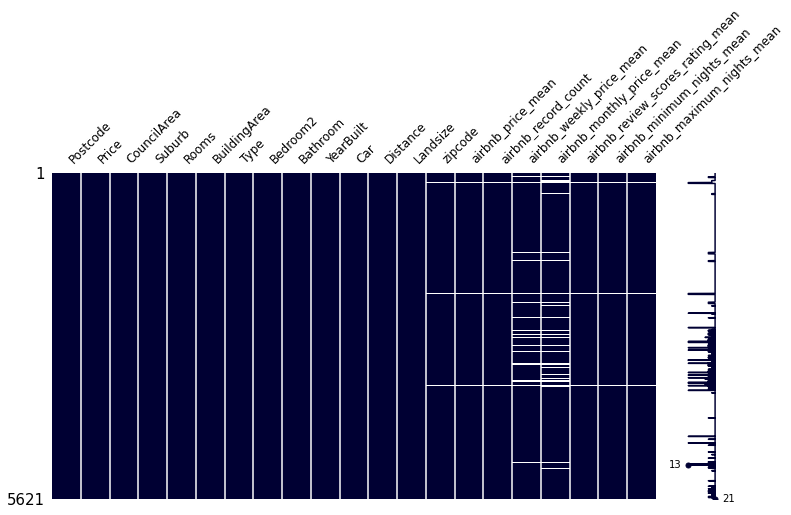

In [10]:
msno.matrix(
    melb_df, figsize=(12, 6), fontsize=12, color=[0, 0, 0.2]
)  # out of context checking for lost values

In [11]:
melb_df.CouncilArea.unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Kingston', 'Brimbank', 'Melbourne', 'Hume', 'Melton', 'Maroondah',
       'Greater Dandenong', 'Nillumbik', 'Whittlesea', 'Wyndham', 'Knox',
       'Casey', 'Yarra Ranges'], dtype=object)

In [12]:
melb_df.shape  # this tells me 22 rows but the dataframe has 21 by inspection, it must be counting the index.

(5621, 21)

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
feature_arry = encoder.fit_transform(
    melb_df[categorical_cols]
).toarray()  # transforming to array
# We can inspect the categories found by the encoder
# encoder.categories_
print(
    len(encoder.categories_[0]),
    len(encoder.categories_[1]),
    len(encoder.categories_[2]),
)
# 28+253+3 = 284

28 253 3


In [14]:
feature_labels = encoder.categories_  # saving categories in a variable
feature_labels

[array(['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Casey', 'Darebin',
        'Glen Eira', 'Greater Dandenong', 'Hobsons Bay', 'Hume',
        'Kingston', 'Knox', 'Manningham', 'Maribyrnong', 'Maroondah',
        'Melbourne', 'Melton', 'Monash', 'Moonee Valley', 'Moreland',
        'Nillumbik', 'Port Phillip', 'Stonnington', 'Whitehorse',
        'Whittlesea', 'Wyndham', 'Yarra', 'Yarra Ranges'], dtype=object),
 array(['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale',
        'Albert Park', 'Albion', 'Alphington', 'Altona', 'Altona Meadows',
        'Altona North', 'Ardeer', 'Armadale', 'Ascot Vale', 'Ashburton',
        'Ashwood', 'Aspendale', 'Avondale Heights', 'Balaclava', 'Balwyn',
        'Balwyn North', 'Bayswater', 'Bayswater North', 'Beaumaris',
        'Bellfield', 'Bentleigh', 'Bentleigh East', 'Black Rock',
        'Blackburn', 'Blackburn North', 'Blackburn South', 'Bonbeach',
        'Boronia', 'Box Hill', 'Braybrook', 'Briar Hill', 'Brighton',
        'Bright

In [15]:
feature_labels = np.hstack(feature_labels)  # stacking the arrays into one
print(len(feature_labels))

284


In [16]:
features = pd.DataFrame(
    feature_arry, columns=feature_labels
)  # creating pandas dataframe using feature_arry as data
# and feature_labels as columns
features

,Banyule,Bayside,Boroondara,Brimbank,Casey,Darebin,Glen Eira,Greater Dandenong,Hobsons Bay,Hume,...,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,h,t,u
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5619,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
features.shape  # 284 columns, the exact same nuumber of features labels

(5621, 284)

#### esto nos dice que el dataframe nos tiene que quedar de 302 columnas (284+21-3(elimino las 3 columnas codificadas)) 

In [18]:
features = (
    features.reset_index()
)  # important to do this because the features went through transformations
melb_df = melb_df.reset_index()  # its good to do the same with melb_df
melb_df_encoded = pd.concat(
    [melb_df, features], axis=1, join="inner"
)  # concatening dataframes.
melb_df_encoded = melb_df_encoded.reset_index()  # resesting index for futher processing
melb_df_encoded  # 308 columns, must delete unuseful columns

,level_0,index,Postcode,Price,CouncilArea,Suburb,Rooms,BuildingArea,Type,Bedroom2,...,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,h,t,u
0,0,0,3067.0,1035000.0,Yarra,Abbotsford,2,79.0,h,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,3067.0,1465000.0,Yarra,Abbotsford,3,150.0,h,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,2,3067.0,1600000.0,Yarra,Abbotsford,4,142.0,h,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,3,3067.0,1876000.0,Yarra,Abbotsford,3,210.0,h,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,4,3067.0,1636000.0,Yarra,Abbotsford,2,107.0,h,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,5616,6126,3012.0,670000.0,Maribyrnong,Maidstone,3,128.0,t,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5617,5617,6127,3012.0,821000.0,Maribyrnong,Maidstone,4,151.0,t,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5618,5618,6128,3046.0,545000.0,Moreland,Oak Park,2,80.0,t,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5619,5619,6129,3073.0,672000.0,Darebin,Reservoir,2,120.0,t,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
melb_df_encoded.columns  # level_0, index and categorical_cols are unuseful.

Index(['level_0', 'index', 'Postcode', 'Price', 'CouncilArea', 'Suburb',
       'Rooms', 'BuildingArea', 'Type', 'Bedroom2',
       ...
       'Williamstown', 'Williamstown North', 'Windsor', 'Wollert',
       'Wyndham Vale', 'Yallambie', 'Yarraville', 'h', 't', 'u'],
      dtype='object', length=308)

In [20]:
melb_df_encoded = melb_df_encoded.drop(
    categorical_cols, axis=1
)  # deleting categorical columns
melb_df_encoded

,level_0,index,Postcode,Price,Rooms,BuildingArea,Bedroom2,Bathroom,YearBuilt,Car,...,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,h,t,u
0,0,0,3067.0,1035000.0,2,79.0,2.0,1.0,1900.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,1,3067.0,1465000.0,3,150.0,3.0,2.0,1900.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,2,3067.0,1600000.0,4,142.0,3.0,1.0,2014.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,3,3067.0,1876000.0,3,210.0,4.0,2.0,1910.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,4,3067.0,1636000.0,2,107.0,2.0,1.0,1890.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,5616,6126,3012.0,670000.0,3,128.0,3.0,2.0,2016.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5617,5617,6127,3012.0,821000.0,4,151.0,4.0,3.0,2014.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5618,5618,6128,3046.0,545000.0,2,80.0,2.0,1.0,2013.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5619,5619,6129,3073.0,672000.0,2,120.0,2.0,1.0,2012.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# error warning: if when you run the code the level_0 column is not found, delete it from the code below,
# the important thing is that the dataframe endsup with 302 columns
melb_df_encoded = melb_df_encoded.drop(["index", "level_0"], axis=1)

In [22]:
melb_df_encoded

,Postcode,Price,Rooms,BuildingArea,Bedroom2,Bathroom,YearBuilt,Car,Distance,Landsize,...,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,h,t,u
0,3067.0,1035000.0,2,79.0,2.0,1.0,1900.0,0.0,2.5,156.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3067.0,1465000.0,3,150.0,3.0,2.0,1900.0,0.0,2.5,134.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3067.0,1600000.0,4,142.0,3.0,1.0,2014.0,2.0,2.5,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3067.0,1876000.0,3,210.0,4.0,2.0,1910.0,0.0,2.5,245.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3067.0,1636000.0,2,107.0,2.0,1.0,1890.0,2.0,2.5,256.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,3012.0,670000.0,3,128.0,3.0,2.0,2016.0,2.0,6.4,159.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5617,3012.0,821000.0,4,151.0,4.0,3.0,2014.0,2.0,6.4,294.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5618,3046.0,545000.0,2,80.0,2.0,1.0,2013.0,1.0,11.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5619,3073.0,672000.0,2,120.0,2.0,1.0,2012.0,1.0,12.0,243.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
melb_df_encoded.values  # matriz subyaciente.

array([[3.067e+03, 1.035e+06, 2.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.067e+03, 1.465e+06, 3.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.067e+03, 1.600e+06, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.046e+03, 5.450e+05, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.073e+03, 6.720e+05, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.015e+03, 7.300e+05, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

#### El dataframe queda de 302 columnas como era lo esperado

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = merged_sales_df1.copy(deep=True)
#melb_data_mice

In [25]:
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[["YearBuilt", "BuildingArea"]] = mice_imputer.fit_transform(
    melb_data_mice[["YearBuilt", "BuildingArea"]]
)
#melb_data_mice


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

In [26]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = merged_sales_df1.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pd.concat([mice_year_built, melb_year_build])

In [27]:
#data

In [28]:
data = data.reset_index()


In [29]:
#data

In [30]:
data = data.drop(["index"], axis=1)

In [31]:
#data

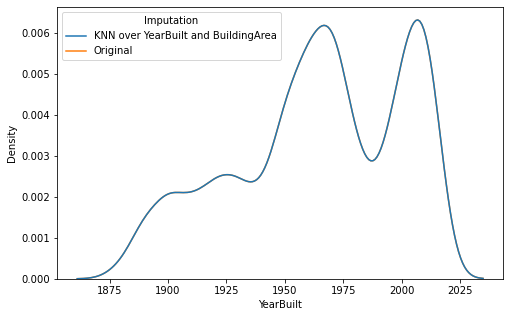

In [32]:
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='YearBuilt', hue='Imputation')

#### Veo nuevamente las variables a imputar del dataset (original), tienen que ser numericas.

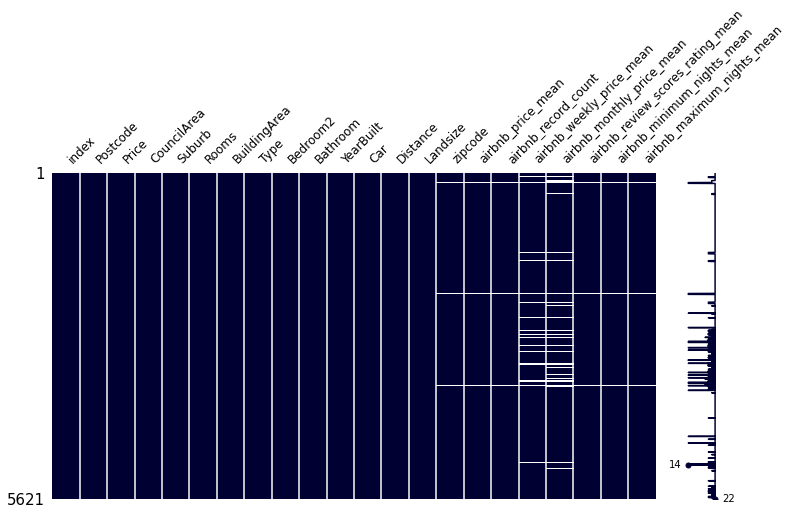

In [33]:
msno.matrix(
    melb_df, figsize=(12, 6), fontsize=12, color=[0, 0, 0.2]
)  # out of context checking for lost values

#### las variables a imputar son
                ["Rooms",
                "YearBuilt",
                "BuildingArea",
                "Bedroom2",
                "Bathroom",
                "Car",
                "Distance",
                "Landsize",
                "airbnb_price_mean",
                "airbnb_record_count",
                "airbnb_weekly_price_mean",
                "airbnb_monthly_price_mean",
                "airbnb_review_scores_rating_mean"] 
                
 no uso 'airbnb_minimum_nights_mean', 'airbnb_maximum_nights_mean' porque parecen irrelevantes para el problema.

#### Antes de realizar la imputacion, hay que escalar las variables numericas. Como ya eliminamos los outliers el proceso de escalamiento es seguro, y no hay necesidad de utilizar StandarScaler (mas robusto con los outliers).

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
columns_to_use =["Rooms",
                "YearBuilt",
                "BuildingArea",
                "Bedroom2",
                "Bathroom",
                "Car",
                "Distance",
                "Landsize",
                "airbnb_price_mean",
                "airbnb_record_count",
                "airbnb_weekly_price_mean",
                "airbnb_monthly_price_mean",
                "airbnb_review_scores_rating_mean"] 

scaler = MinMaxScaler()
melb_df_encoded[columns_to_use] = scaler.fit_transform(melb_df_encoded[columns_to_use])
melb_df_encoded

C:\Users\joaqu\.conda\envs\diplodatos-ayvd\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\joaqu\.conda\envs\diplodatos-ayvd\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Postcode,Price,Rooms,BuildingArea,Bedroom2,Bathroom,YearBuilt,Car,Distance,Landsize,...,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,h,t,u
0,3067.0,1035000.0,0.25,0.152778,0.25,0.000000,0.147059,0.0,0.042623,0.022721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3067.0,1465000.0,0.50,0.293651,0.50,0.333333,0.147059,0.0,0.042623,0.019516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3067.0,1600000.0,0.75,0.277778,0.50,0.000000,0.985294,0.4,0.042623,0.017477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3067.0,1876000.0,0.50,0.412698,0.75,0.333333,0.220588,0.0,0.042623,0.035683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3067.0,1636000.0,0.25,0.208333,0.25,0.000000,0.073529,0.4,0.042623,0.037285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,3012.0,670000.0,0.50,0.250000,0.50,0.333333,1.000000,0.4,0.170492,0.023158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5617,3012.0,821000.0,0.75,0.295635,0.75,0.666667,0.985294,0.4,0.170492,0.042820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5618,3046.0,545000.0,0.25,0.154762,0.25,0.000000,0.977941,0.2,0.327869,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5619,3073.0,672000.0,0.25,0.234127,0.25,0.000000,0.970588,0.2,0.354098,0.035392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
melb_df.columns


Index(['index', 'Postcode', 'Price', 'CouncilArea', 'Suburb', 'Rooms',
       'BuildingArea', 'Type', 'Bedroom2', 'Bathroom', 'YearBuilt', 'Car',
       'Distance', 'Landsize', 'zipcode', 'airbnb_price_mean',
       'airbnb_record_count', 'airbnb_weekly_price_mean',
       'airbnb_monthly_price_mean', 'airbnb_review_scores_rating_mean',
       'airbnb_minimum_nights_mean', 'airbnb_maximum_nights_mean'],
      dtype='object')

In [37]:
melb_data_mice = melb_df_encoded.copy(deep=True)
melb_data_mice2 = melb_df_encoded.copy(deep=True)
#melb_data_mice

In [38]:
#En la siguiente lista contengo todas las columnas a emplear 
columns_to_use =["Rooms",
                "YearBuilt",
                "BuildingArea",
                "Bedroom2",
                "Bathroom",
                "Car",
                "Distance",
                "Landsize",
                "airbnb_price_mean",
                "airbnb_record_count",
                "airbnb_weekly_price_mean",
                "airbnb_monthly_price_mean",
                "airbnb_review_scores_rating_mean"] 
#en las siguientes lista solo me quedo las columnas con Nan que van a ser imputados
columns_to_use2 = [                                                                       
                "Landsize",                
                "airbnb_price_mean",
                "airbnb_record_count",
                "airbnb_weekly_price_mean",
                "airbnb_monthly_price_mean",
                "airbnb_review_scores_rating_mean"] 

#### En este ejemplo sencillo Comparo dos formas diferentes de imputar


In [39]:
#This imputes using all columns
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[columns_to_use] = mice_imputer.fit_transform(
    melb_data_mice[columns_to_use]
)
#this imputes using only ["YearBuilt, BuildingArea","airbnb_monthly_price_mean"]
mice_imputer2 = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice2[["YearBuilt",
                "BuildingArea",
                "airbnb_monthly_price_mean"]] = mice_imputer2.fit_transform(
    melb_data_mice2[["YearBuilt",
                   "BuildingArea",
                   "airbnb_monthly_price_mean"]]
)
#melb_data_mice

C:\Users\joaqu\.conda\envs\diplodatos-ayvd\lib\site-packages\sklearn\impute\_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [40]:
mice_airbnb_monthly_price_mean = melb_data_mice.airbnb_monthly_price_mean.to_frame()
mice_airbnb_monthly_price_mean['Imputation'] = 'KNN over everything'
melb_airbnb_monthly_price_mean = melb_df_encoded.airbnb_monthly_price_mean.dropna().to_frame()
melb_airbnb_monthly_price_mean['Imputation'] = 'Original'
#------------------------------------------------------------------------------------
mice2_airbnb_monthly_price_mean = melb_data_mice2.airbnb_monthly_price_mean.to_frame()
mice2_airbnb_monthly_price_mean['Imputation'] = 'KNN over YearBuilt, BuildingArea and monthly_price_mean'
data1 = pd.concat([mice_airbnb_monthly_price_mean, melb_airbnb_monthly_price_mean,mice2_airbnb_monthly_price_mean ])

In [41]:
data1=data1.reset_index()
data1=data1.drop(["index"], axis=1)

In [42]:
data1

,airbnb_monthly_price_mean,Imputation
0,0.197535,KNN over everything
1,0.197535,KNN over everything
2,0.197535,KNN over everything
3,0.197535,KNN over everything
4,0.197535,KNN over everything
...,...,...
16399,0.215952,"KNN over YearBuilt, BuildingArea and monthly_p..."
16400,0.215952,"KNN over YearBuilt, BuildingArea and monthly_p..."
16401,0.059330,"KNN over YearBuilt, BuildingArea and monthly_p..."
16402,0.106996,"KNN over YearBuilt, BuildingArea and monthly_p..."


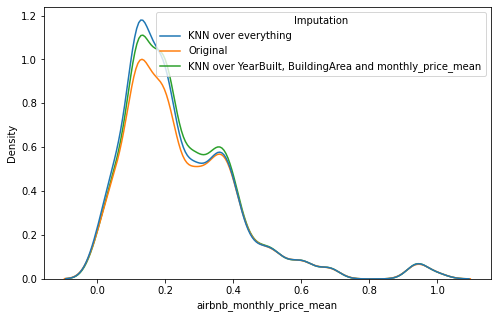

In [43]:
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data1, x='airbnb_monthly_price_mean', hue='Imputation')

### Ahora lo hago con todas las columnas 

In [44]:
melb_data_mice3 = melb_df_encoded.copy()
for column in columns_to_use2:
    mice_imputer3 = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
    melb_data_mice3[["YearBuilt",
                "BuildingArea",
                column]] = mice_imputer3.fit_transform(
    melb_data_mice3[["YearBuilt",
                   "BuildingArea",
                   column]]
    )

In [72]:
#melb_data_mice3

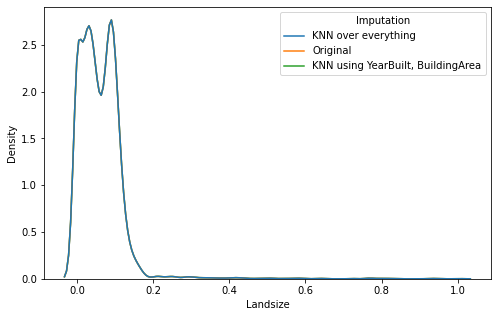

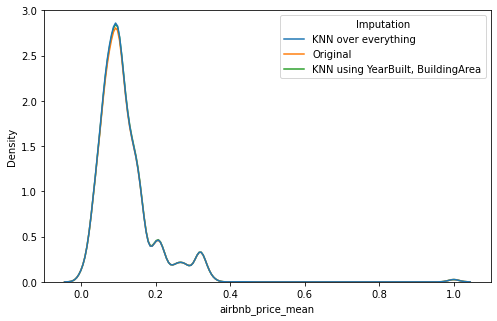

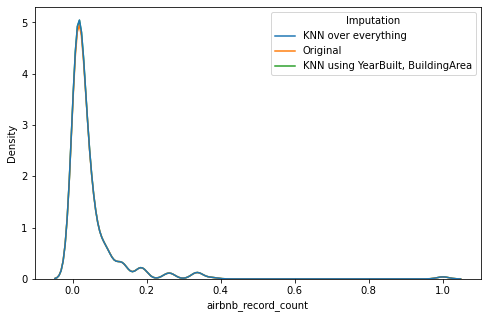

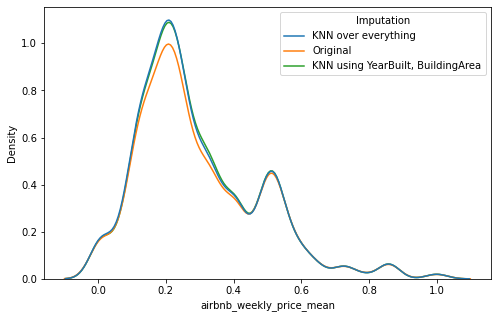

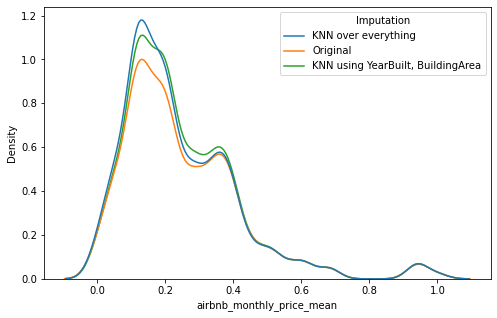

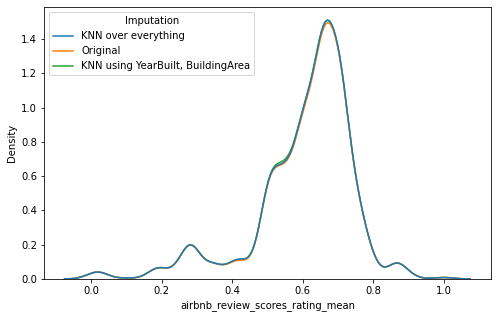

In [71]:
for column in columns_to_use2:    
    mice_airbnb_juntas = melb_data_mice[column].copy().to_frame() #this was obtained in the previous example
    mice_airbnb_juntas['Imputation'] = 'KNN over everything'
    mice_airbnb_juntas
    melb_airbnb =melb_df_encoded[column].dropna().copy().to_frame()
    melb_airbnb['Imputation'] = 'Original'
    #------------------------------------------------------------------------------------
    mice_airbnb_separadas = melb_data_mice3[column].copy().to_frame()
    mice_airbnb_separadas['Imputation'] = 'KNN using YearBuilt, BuildingArea'
    data1 = pd.concat([mice_airbnb_juntas,melb_airbnb ,mice_airbnb_separadas ])
    data1=data1.reset_index()
    data1=data1.drop(["index"], axis=1)
    fig = plt.figure(figsize=(8, 5))
    g = sns.kdeplot(data=data1, x=column, hue='Imputation')
#i rewrite data1 over each iteration    

#### Mirando las imagenes anteriores concluyo en que es lo mismo utilizar una estrategia o la otra, diria que es mejor usar todas las variables, pero computacionalmente es mejor usar solo Yearbuilt y BuildingArea

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [73]:
melb_df = melb_data_mice.copy()

In [74]:
melb_df = melb_df.dropna()  # elimino los pocos Nan de zipcode

In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# scaler = StandardScaler()
# melb_df_scaler = scaler.fit_transform(melb_df)


pca = PCA(n_components=20)
pca_dummy_features = pca.fit_transform(melb_df)
melb_df_pca = np.hstack([melb_df, pca_dummy_features])

In [76]:
print(
    "Explained variand ratio (PCA firs 20 components) : %s"
    % str(pca.explained_variance_ratio_)
)

Explained variand ratio (PCA firs 20 components) : [9.99985071e-01 1.49027698e-05 2.64740778e-08 3.67366374e-11
 9.46253666e-13 4.85932069e-13 3.61107831e-13 2.89499604e-13
 2.83649378e-13 2.69946079e-13 2.48156157e-13 2.27720708e-13
 2.06557360e-13 1.92844852e-13 1.69725959e-13 1.59827958e-13
 1.48831329e-13 1.39218257e-13 1.28619958e-13 1.17202885e-13]


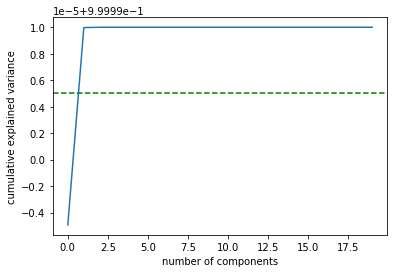

In [77]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.axhline(y=0.999995, color="g", linestyle="--")

In [78]:
new_columns = [
    "pca1",
    "pca2",
    "pca3",
    "pca4",
    "pca5",
    "pca6",
    "pca7",
    "pca8",
    "pca9",
    "pca10",
    "pca11",
    "pca12",
    "pca13",
    "pca14",
    "pca15",
    "pca16",
    "pca17",
    "pca18",
    "pca19",
    "pca20",
]
processed_melb_df = pd.DataFrame(data=pca_dummy_features, columns=new_columns)
processed_melb_df.shape

(5559, 20)

In [79]:
pca.explained_variance_ratio_[0:3].sum()

0.9999999999555114

Tomamos las primeras 3 componenetes princilapes que representan casi un 100% de la informacion de la muestra

In [80]:
melb_df_pca3 = processed_melb_df[["pca1", "pca2", "pca3"]]

In [81]:
melb_df_pca3

,pca1,pca2,pca3
0,-7836.639461,-215.523214,-42.881873
1,422163.351728,-129.854531,-58.333642
2,557163.348961,-102.958548,-63.184648
3,833163.343306,-47.971207,-73.102566
4,593163.348224,-95.786283,-64.478223
...,...,...,...
5554,-372836.634315,-290.557278,-107.554171
5555,-221836.637410,-260.473627,-112.980360
5556,-497836.598877,-471.897046,-55.410877
5557,-370836.579630,-549.429465,-22.079713


In [86]:
melb_df_pca3 = melb_df_pca3.reset_index()
melb_df = melb_df.reset_index()

melb_df_merge = pd.merge(melb_df, melb_df_pca3, how="inner", on="index")
melb_df_merge = melb_df_merge.drop(["index"], axis=1)

In [87]:
melb_df_merge  # el problema de los indices se soluciona haciendo KNN en las variables que tienen nan

,Postcode,Price,Rooms,BuildingArea,Bedroom2,Bathroom,YearBuilt,Car,Distance,Landsize,...,Wyndham Vale,Yallambie,Yarraville,h,t,u,level_0,pca1,pca2,pca3
0,3067.0,1035000.0,0.25,0.152778,0.25,0.000000,0.147059,0.0,0.042623,0.022721,...,0.0,0.0,0.0,1.0,0.0,0.0,0,-7836.639461,-215.523214,-42.881873
1,3067.0,1465000.0,0.50,0.293651,0.50,0.333333,0.147059,0.0,0.042623,0.019516,...,0.0,0.0,0.0,1.0,0.0,0.0,1,422163.351728,-129.854531,-58.333642
2,3067.0,1600000.0,0.75,0.277778,0.50,0.000000,0.985294,0.4,0.042623,0.017477,...,0.0,0.0,0.0,1.0,0.0,0.0,2,557163.348961,-102.958548,-63.184648
3,3067.0,1876000.0,0.50,0.412698,0.75,0.333333,0.220588,0.0,0.042623,0.035683,...,0.0,0.0,0.0,1.0,0.0,0.0,3,833163.343306,-47.971207,-73.102566
4,3067.0,1636000.0,0.25,0.208333,0.25,0.000000,0.073529,0.4,0.042623,0.037285,...,0.0,0.0,0.0,1.0,0.0,0.0,4,593163.348224,-95.786283,-64.478223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,3188.0,771000.0,0.25,0.192460,0.25,0.000000,0.823529,0.2,0.413115,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,5554,-372836.634315,-290.557278,-107.554171
5493,3012.0,650000.0,0.50,0.250000,0.50,0.333333,1.000000,0.4,0.170492,0.023158,...,0.0,0.0,0.0,0.0,1.0,0.0,5555,-221836.637410,-260.473627,-112.980360
5494,3194.0,940000.0,0.50,0.309395,0.50,0.000000,0.801471,0.4,0.616393,0.048209,...,0.0,0.0,0.0,0.0,1.0,0.0,5556,-497836.598877,-471.897046,-55.410877
5495,3195.0,1627000.0,0.50,0.458333,0.50,0.333333,0.933824,0.4,0.665574,0.044276,...,0.0,0.0,0.0,0.0,1.0,0.0,5557,-370836.579630,-549.429465,-22.079713


In [89]:
melb_data_mice.dropna()

,Postcode,Price,Rooms,BuildingArea,Bedroom2,Bathroom,YearBuilt,Car,Distance,Landsize,...,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,h,t,u
0,3067.0,1035000.0,0.25,0.152778,0.25,0.000000,0.147059,0.0,0.042623,0.022721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3067.0,1465000.0,0.50,0.293651,0.50,0.333333,0.147059,0.0,0.042623,0.019516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3067.0,1600000.0,0.75,0.277778,0.50,0.000000,0.985294,0.4,0.042623,0.017477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3067.0,1876000.0,0.50,0.412698,0.75,0.333333,0.220588,0.0,0.042623,0.035683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3067.0,1636000.0,0.25,0.208333,0.25,0.000000,0.073529,0.4,0.042623,0.037285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,3012.0,670000.0,0.50,0.250000,0.50,0.333333,1.000000,0.4,0.170492,0.023158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5617,3012.0,821000.0,0.75,0.295635,0.75,0.666667,0.985294,0.4,0.170492,0.042820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5618,3046.0,545000.0,0.25,0.154762,0.25,0.000000,0.977941,0.2,0.327869,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5619,3073.0,672000.0,0.25,0.234127,0.25,0.000000,0.970588,0.2,0.354098,0.035392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ["Type", "Regionname"]
numerical_cols = ["Rooms", "Distance"]
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
    for col_value in col_values:
        new_columns.append("{}={}".format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(["pca1", "pca2"])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
